# Regression model

## Problem: using used car dataset train a regression model that will predict the price of a used car given a set of features ###
- data source: https://www.kaggle.com/datasets/meruvulikith/90000-cars-data-from-1970-to-2024

### Explore and transform data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import os

In [53]:
data = pd.read_csv('CarsData.csv')

In [54]:
data.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
5,C-HR,2019,26791,Automatic,2373,Hybrid,135,74.3,1.8,toyota
6,Kuga,2019,17990,Manual,7038,Petrol,145,34.4,1.5,ford
7,Tiguan,2019,27490,Semi-Auto,3000,Petrol,145,30.4,2.0,volkswagen
8,Fiesta,2018,9891,Manual,31639,Petrol,145,65.7,1.0,ford
9,A Class,2017,17498,Manual,9663,Diesel,30,62.8,2.1,merc


In [55]:
# check for nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [56]:
data.describe()

,year,price,mileage,tax,mpg,engineSize
count,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000,97712.000000
mean,2017.066502,16773.487555,23219.475499,120.142408,55.205623,1.664913
std,2.118661,9868.552222,21060.882301,63.357250,16.181659,0.558574
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,9999.000000,7673.000000,125.000000,47.100000,1.200000
50%,2017.000000,14470.000000,17682.500000,145.000000,54.300000,1.600000
75%,2019.000000,20750.000000,32500.000000,145.000000,62.800000,2.000000
max,2024.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


#### engine size of zero is not possible given that the fuel type is petrol, diesel or hybrid (which also uses internal combustion engine)


In [57]:
data.loc[data['engineSize'] == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
449,i3,2017,19895,Automatic,29851,Hybrid,0,470.8,0.0,BMW
969,i3,2016,14900,Automatic,59945,Hybrid,0,470.8,0.0,BMW
1985,3 Series,2018,18000,Automatic,24240,Diesel,150,64.2,0.0,BMW
2219,Astra,2017,11000,Manual,14878,Petrol,145,51.4,0.0,vauxhall
3290,I10,2015,7500,Manual,13637,Petrol,30,57.6,0.0,hyundi
...,...,...,...,...,...,...,...,...,...,...
95623,Fiesta,2018,12999,Manual,15000,Petrol,150,58.9,0.0,ford
95625,I20,2017,11400,Automatic,12661,Petrol,145,44.1,0.0,hyundi
96910,Mondeo,2013,5328,Manual,105000,Diesel,30,65.7,0.0,ford
97033,I10,2016,6300,Manual,17272,Petrol,20,61.4,0.0,hyundi


In [58]:
df = data  # make a copy of the data

#### look for any other records of the same make and model of vehicle as those with engineSize of zero group by model, transmission and fuelType and find the max engine size. then for records with engineSize of zero, fill in with engineSize of similar model, transmission and fuel

In [59]:
max_engine_size = df.groupby(['model', 'transmission', 'fuelType'])['engineSize'].transform('max')

# for rows where engineSize is zero, update to the group's max engineSize
df.loc[df['engineSize'] == 0, 'engineSize'] = max_engine_size[df['engineSize'] == 0]

#### there are several rows that have an mpg f 470.8 or 235.4 which is unrealistic. remove these rows

In [60]:
df = df[df['mpg'] != 470.8]
df = df[df['mpg'] != 235.4]

#### still three rows where engine size is zero.

In [61]:
df.loc[df['engineSize'] == 0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
16356,GLA Class,2016,18700,Other,30895,Other,125,56.5,0.0,merc
28268,Puma,2019,23999,Manual,3000,Hybrid,150,50.4,0.0,ford
52951,230,2007,4500,Automatic,94000,Petrol,520,29.4,0.0,merc


#### one row is a mercedes GLA from 2016 and has a fuelType of 'Other'
- searched the internet for that make model and year of vehicle.
- This vehicle did not have a hybrid option and came with a 2.0 liter petrol engine

In [62]:
df.loc[(df['fuelType'] == 'Other') & (df['Manufacturer'] == 'merc') & (df['engineSize'] == 0)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
16356,GLA Class,2016,18700,Other,30895,Other,125,56.5,0.0,merc


In [63]:
df.at[16356, 'fuelType'] = 'Petrol'
df.at[16356, 'engineSize'] = 2.0

#### fill in engine size for last two rows that have zero engine size. searched for vehicle information on these make/model cars

In [64]:
df.at[28268, 'engineSize'] = 1.0
df.at[52951, 'engineSize'] = 2.5

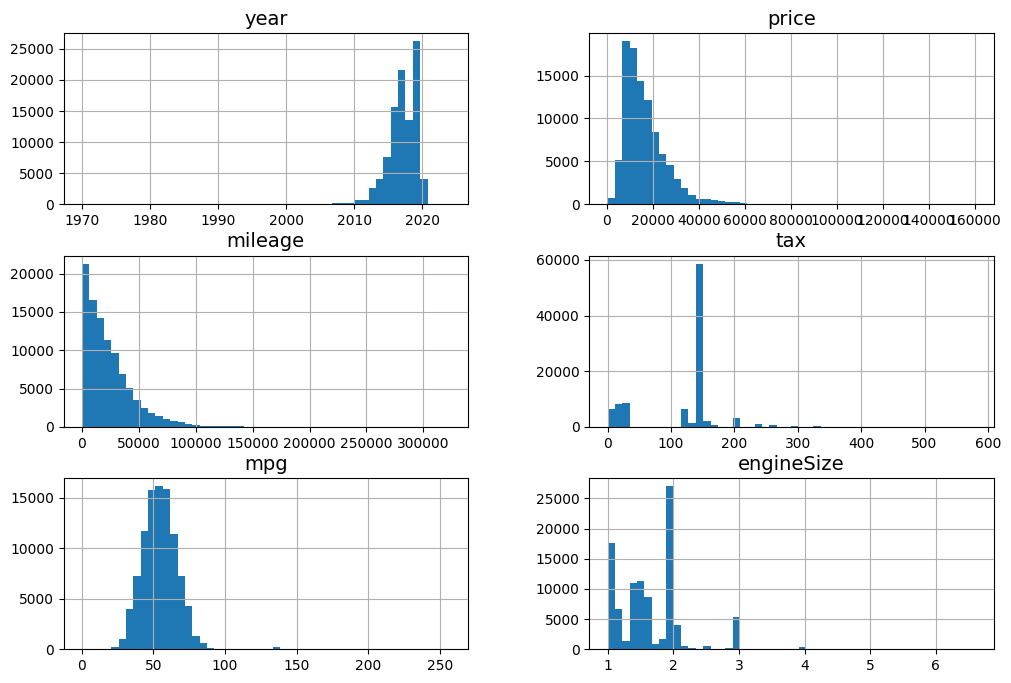

In [65]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
plt.show()

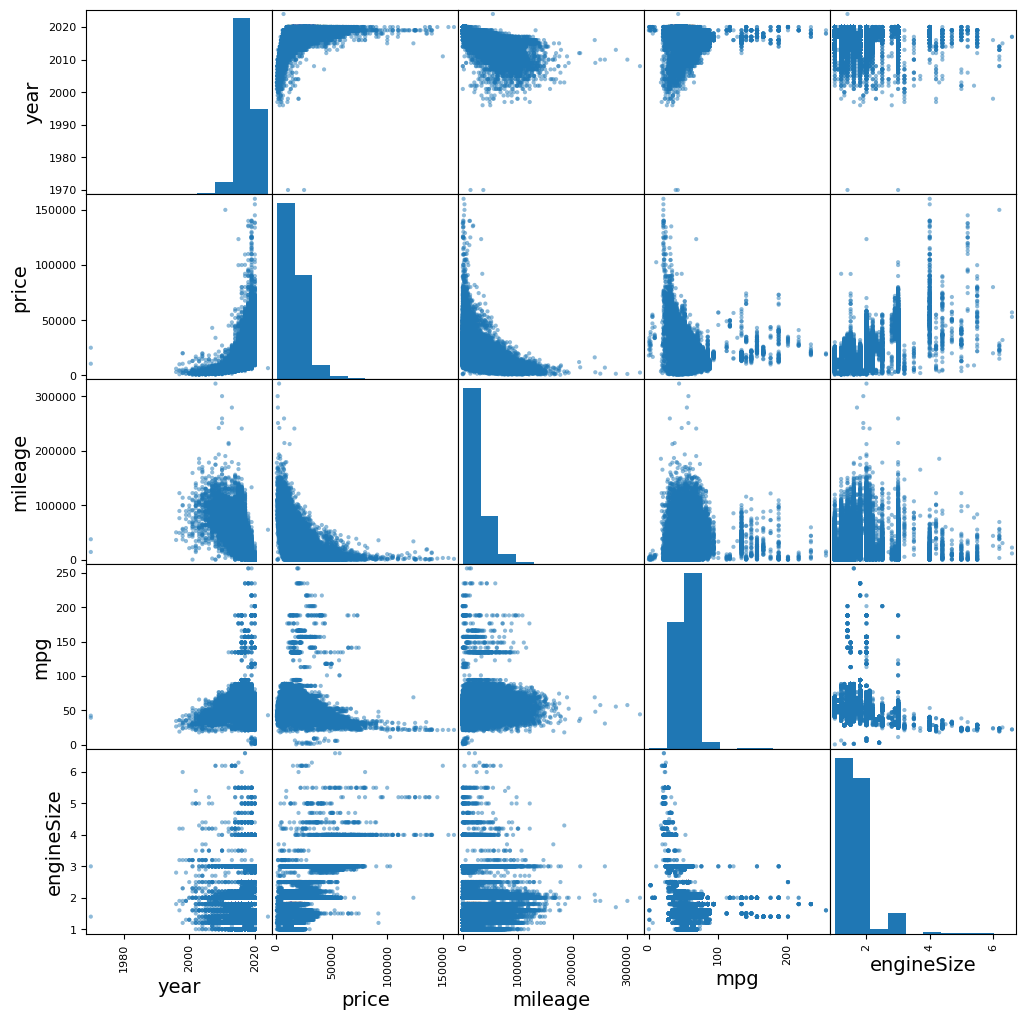

In [66]:
features = [
    'year',
    'price',
    'mileage',
    # 'tax',
    'mpg',
    'engineSize',
    ]
scatter_matrix(df[features], figsize=(12, 12))
plt.show()

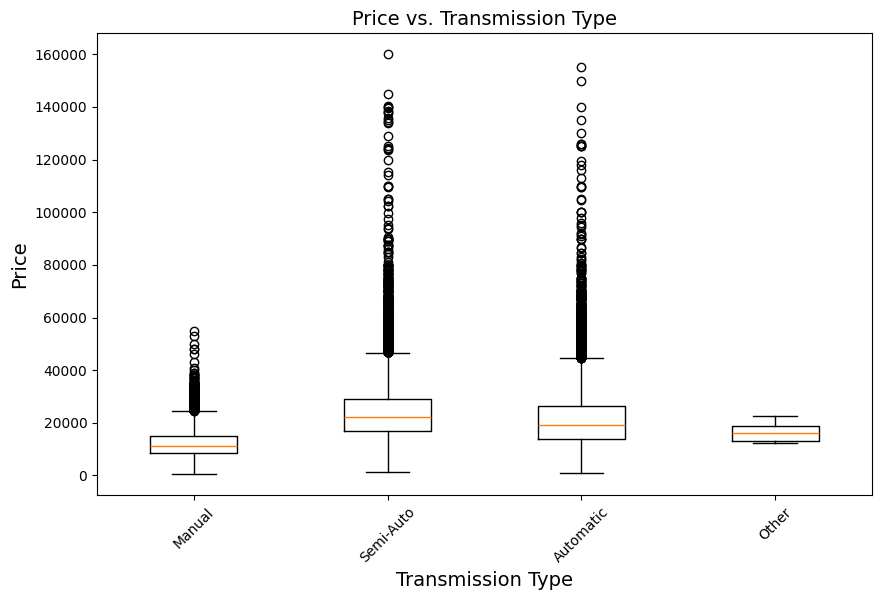

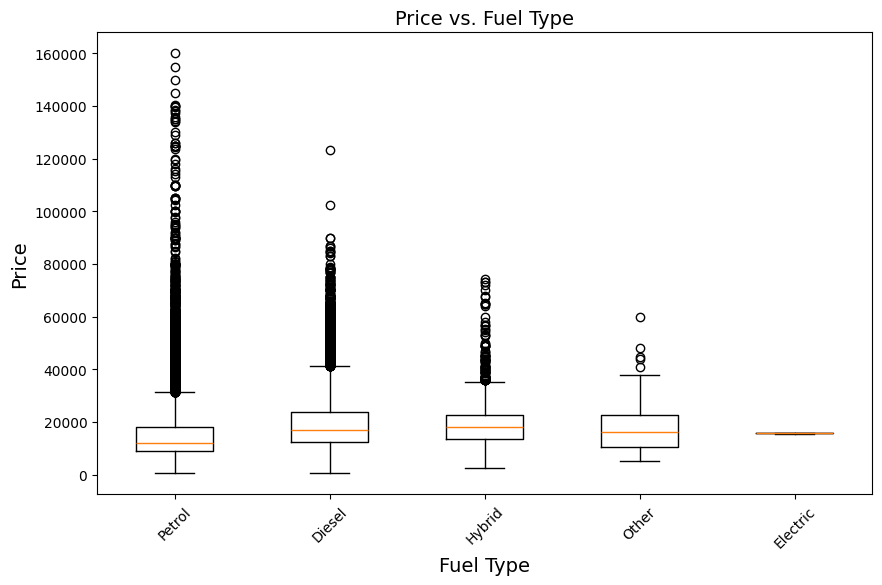

In [67]:
# box plots of price vs transmission type 
transmission_types = df['transmission'].unique()
fuel_types = df['fuelType'].unique()

# create list of prices by transmission type
prices_by_transmission = [df[df['transmission'] == t]['price'] for t in transmission_types]

# do the same for fuel type
prices_by_fuel_type = [df[df['fuelType'] == f]['price'] for f in fuel_types]

# price vs transmission type
plt.figure(figsize=(10, 6))
plt.boxplot(prices_by_transmission, labels=transmission_types)
plt.title('Price vs. Transmission Type')
plt.xlabel('Transmission Type')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.show()

# price vs fuel type
plt.figure(figsize=(10, 6))
plt.boxplot(prices_by_fuel_type, labels=fuel_types)
plt.title('Price vs. Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.show()

In [68]:
# look for outliers using scipy zscore
from scipy import stats

In [69]:
# Calculate Z-scores
z_scores = np.abs(stats.zscore(df['price']))

# Identify outliers
outliers_z = df[(z_scores > 3)]

# Count the number of outliers
num_outliers_z = outliers_z.shape[0]

# 1745 total outliers with a zscore greater than 3
num_outliers_z

1748

#### use get_dummies method to one hot encode transmission and fuel features

In [70]:
df = pd.get_dummies(df, columns=['transmission', 'fuelType'])

#### use frequency encoding on model and manufacturer features because there are too many unique values for these to use one hot encoding

In [71]:
frequency = df['model'].value_counts() / len(df)
df['model_encoded'] = df['model'].map(frequency)

frequency = df['Manufacturer'].value_counts() / len(df)
df['Manufacturer_encoded'] = df['Manufacturer'].map(frequency)

df.drop(columns=['model', 'Manufacturer'], inplace=True)

#### Apply log transformation to the 'price' column

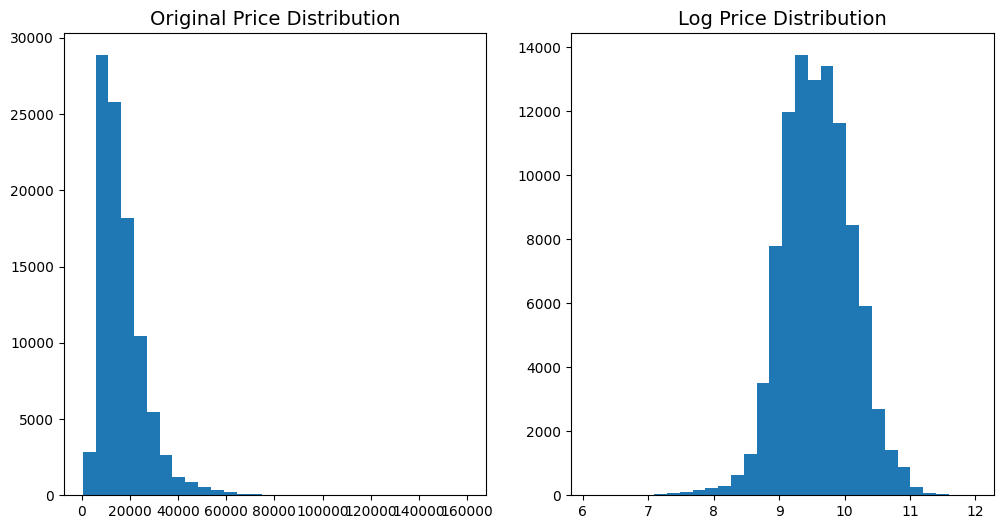

In [72]:
# Adding 1 to avoid log(0)
df['price_log'] = np.log(df['price'] + 1)

# plot original data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df['price'], bins=30)
plt.title('Original Price Distribution')

# plt transformed data
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(df['price_log'], bins=30)
plt.title('Log Price Distribution')

plt.show()

# drop the price column
del df['price']

In [73]:
corr_matrix = df.corr()
corr_matrix['price_log'].sort_values(ascending=False)

price_log                 1.000000
year                      0.627600
engineSize                0.586665
transmission_Semi-Auto    0.428289
tax                       0.325606
transmission_Automatic    0.258945
fuelType_Diesel           0.252531
fuelType_Hybrid           0.071266
fuelType_Other            0.007327
transmission_Other        0.001587
fuelType_Electric         0.000672
Manufacturer_encoded     -0.070587
model_encoded            -0.237413
fuelType_Petrol          -0.275709
mpg                      -0.299234
mileage                  -0.511287
transmission_Manual      -0.573374
Name: price_log, dtype: float64

**mpg and mileage are not closely correlated with the price. would have expected that these would be closely correlated**

### Split data and train model

In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler


In [75]:
X = df.drop('price_log', axis=1) # features
y = df['price_log'] # target

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### use standard scaler to scale data

In [77]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### helper function to try a model and then print its MSE

In [78]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model.__class__.__name__}: MSE = {mse}")


#### loop through models and use the helper function to get an initial idea of which model will perform well on the data

In [79]:
# # try multiple models
# models = [
#     LinearRegression(),
#     Ridge(),
#     Lasso(),
#     RandomForestRegressor(),
#     GradientBoostingRegressor()
# ]

# for model in models:
#     evaluate_model(model, X_train, X_test, y_train, y_test)

**Results:**
- LinearRegression: MSE = 0.04974909122073937
- Ridge: MSE = 0.049748103849431895
- Lasso: MSE = 0.2881378917894695
- RandomForestRegressor: MSE = 0.011423376084537407
- GradientBoostingRegressor: MSE = 0.024606780412892104

**this code ran in 7.5 minutes on an 8 core intel i7 11800H**
- Fitting 5 folds for each of 30 candidates, totalling 150 fits
- Best Parameters: {'max_depth': 44, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 589}
- Best Score: 0.9629518889247418
- RandomForestRegressor with best parameters: MSE = 0.010561440560436508

In [80]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import randint

# # parms for RandomizedSearchCV
# param_distributions = {
#     'n_estimators': randint(100, 1000), # Number of trees in the forest
#     'max_depth': randint(10, 100), # Maximum depth of the tree
#     'min_samples_split': randint(2, 20), # Minimum number of samples required to split an internal node
#     'min_samples_leaf': randint(1, 20), # Minimum number of samples required to be at a leaf node
#     'max_features': ['sqrt', 'log2'] # Number of features to consider at every split
# }

# rf = RandomForestRegressor()

# # init RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     error_score='raise',
#     param_distributions=param_distributions,
#     n_iter=30, # Number of parameter settings that are sampled
#     cv=5, # Number of folds in cross validation
#     verbose=2, # the higher number provides more messages
#     random_state=42,
#     n_jobs=-1 # Number of jobs to run in parallel
# )

# # Fit RandomizedSearchCV
# random_search.fit(X_train, y_train)

# # Print the best parameters and the best score
# print("Best Parameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)

# # You can use the best estimator directly
# best_rf_model = random_search.best_estimator_

# # Evaluate the best model on the test set
# y_pred = best_rf_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f"RandomForestRegressor with best parameters: MSE = {mse}")


**this code ran in 4 minutes. slightly worse results**
- Fitting 5 folds for each of 20 candidates, totalling 100 fits
- Best Parameters: {'max_depth': 42, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 6, 'n_estimators': 450}
- Best Score: 0.9586192391333629
- RandomForestRegressor with best parameters: MSE = 0.011783705760859138

In [81]:
# # adjust parms based on results
# param_distributions = {
#     'n_estimators': randint(400, 600), # Number of trees in the forest
#     'max_depth': randint(40, 50), # Maximum depth of the tree
#     'min_samples_split': randint(2, 20), # Minimum number of samples required to split an internal node
#     'min_samples_leaf': randint(1, 20), # Minimum number of samples required to be at a leaf node
#     'max_features': ['sqrt', 'log2'] # Number of features to consider at every split
# }

# # init RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=rf,
#     error_score='raise',
#     param_distributions=param_distributions,
#     n_iter=20, # Number of parameter settings that are sampled
#     cv=5, # Number of folds in cross validation
#     verbose=2, # the higher number provides more messages
#     random_state=42,
#     n_jobs=-1 # Number of jobs to run in parallel
# )

# random_search.fit(X_train, y_train)

# # Print the best parameters and the best score
# print("Best Parameters:", random_search.best_params_)
# print("Best Score:", random_search.best_score_)

# # You can use the best estimator directly
# best_rf_model = random_search.best_estimator_

# # Evaluate the best model on the test set
# y_pred = best_rf_model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print(f"RandomForestRegressor with best parameters: MSE = {mse}")


#### train best fit model with optimal hyperparams and then save the model

In [82]:
# rf = RandomForestRegressor(max_depth=44, max_features='sqrt', min_samples_leaf=1, min_samples_split=6, n_estimators=589)
# rf.fit(X_train, y_train)

In [5]:
# save the model so it doesn't have to be trained again
from joblib import dump, load

current_directory = os.getcwd()
model_filename = os.path.join(current_directory, 'rf_model.joblib')
# dump(rf, model_filename)


#### Load the model from file and run on test data

In [84]:
best_fit_rf = load(model_filename)

In [85]:
# run best model
y_log_pred = best_fit_rf.predict(X_test)

# transform results back to original scale (before log transform of price)
y_pred = np.expm1(y_log_pred)
y_labels = np.expm1(y_test)

# run evaluations. transform test set back to original scale
mse = mean_squared_error(np.expm1(y_test), y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(np.expm1(y_test), y_pred)
r2 = r2_score(np.expm1(y_test), y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R-squared Score: {r2}")


MSE: 4385309.927364459
RMSE: 2094.1131601144334
MAE: 1147.1997639269528
R-squared Score: 0.9555709563620436


In [86]:
eval_df = pd.DataFrame({'Test Values': y_labels, 'Model Predicted Value': y_pred})
eval_df['PercentDifference'] = (
    (abs(eval_df['Test Values'] - eval_df['Model Predicted Value']) / 
     ((eval_df['Test Values'] + eval_df['Model Predicted Value']) / 2)) * 100).round(2)

In [87]:
eval_df

,Test Values,Model Predicted Value,PercentDifference
36565,13995.0,14101.167301,0.76
5989,11690.0,12231.199371,4.52
28364,17899.0,15427.032987,14.84
39949,17749.0,17434.343563,1.79
60717,20998.0,18797.608733,11.06
...,...,...,...
30876,15550.0,16967.548734,8.72
36181,29995.0,27254.124927,9.58
67567,29980.0,25895.353353,14.62
64243,10490.0,11003.198118,4.78


# Classifiction model

### Problem: using phishing url data set train a classification model that will predict if a given url is a phishing url ###
- data source: https://www.kaggle.com/datasets/danielfernandon/web-page-phishing-dataset

#### Explore and visualize

In [88]:
phishing_data = pd.read_csv('web-page-phishing.csv')

In [89]:
phishing_data.head()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
0,37,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,126,4,1,2,0,1,3,0,2,0,0,0,0,0,0,0,0,0,1,1
3,18,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [90]:
phishing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100077 entries, 0 to 100076
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   url_length      100077 non-null  int64
 1   n_dots          100077 non-null  int64
 2   n_hypens        100077 non-null  int64
 3   n_underline     100077 non-null  int64
 4   n_slash         100077 non-null  int64
 5   n_questionmark  100077 non-null  int64
 6   n_equal         100077 non-null  int64
 7   n_at            100077 non-null  int64
 8   n_and           100077 non-null  int64
 9   n_exclamation   100077 non-null  int64
 10  n_space         100077 non-null  int64
 11  n_tilde         100077 non-null  int64
 12  n_comma         100077 non-null  int64
 13  n_plus          100077 non-null  int64
 14  n_asterisk      100077 non-null  int64
 15  n_hastag        100077 non-null  int64
 16  n_dollar        100077 non-null  int64
 17  n_percent       100077 non-null  int64
 18  n_re

In [91]:
phishing_data.describe()

,url_length,n_dots,n_hypens,n_underline,n_slash,n_questionmark,n_equal,n_at,n_and,n_exclamation,n_space,n_tilde,n_comma,n_plus,n_asterisk,n_hastag,n_dollar,n_percent,n_redirection,phishing
count,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000,100077.000000
mean,39.177683,2.224397,0.405188,0.137724,1.135386,0.024391,0.215834,0.022143,0.143330,0.002608,0.004876,0.003617,0.002378,0.002468,0.004097,0.000450,0.001899,0.109286,0.361532,0.363340
std,47.971847,1.255046,1.285465,0.723995,1.828526,0.167789,0.959802,0.268393,0.913656,0.082207,0.144569,0.078500,0.079558,0.104382,0.284046,0.058028,0.097412,1.695327,0.775492,0.480964
min,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,18.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,24.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,44.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4165.000000,24.000000,43.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,18.000000,5.000000,11.000000,19.000000,60.000000,13.000000,10.000000,174.000000,17.000000,1.000000


#### Data is already all numeric and doesn't really need any scaling or transformation

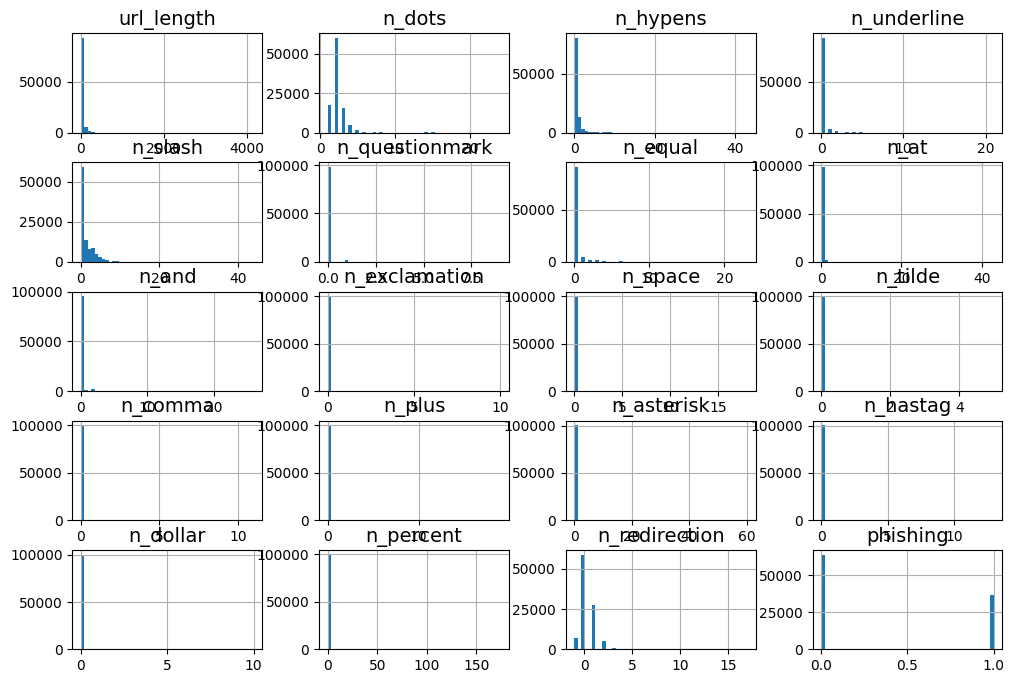

In [92]:
phishing_data.hist(bins=50, figsize=(12, 8))
plt.show()

In [93]:
corr_matrix = phishing_data.corr()
corr_matrix['phishing'].sort_values(ascending=False)

phishing          1.000000
n_slash           0.611472
url_length        0.430125
n_equal           0.260462
n_and             0.189173
n_dots            0.181884
n_underline       0.168305
n_questionmark    0.167045
n_hypens          0.150413
n_at              0.109056
n_tilde           0.049616
n_exclamation     0.029358
n_comma           0.026512
n_percent         0.026117
n_dollar          0.025799
n_asterisk        0.019092
n_space           0.014757
n_hastag          0.010257
n_plus            0.006619
n_redirection    -0.050822
Name: phishing, dtype: float64

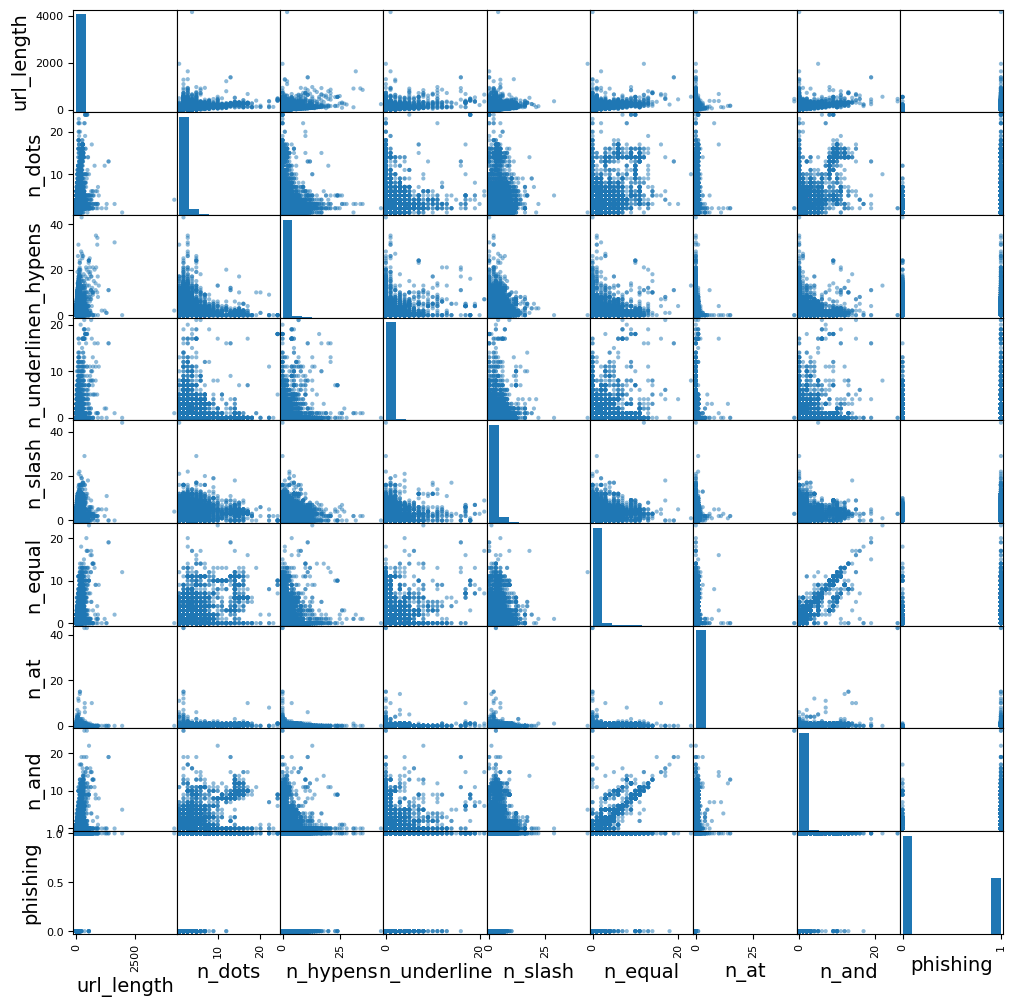

In [94]:
features = [
    'url_length',
    'n_dots',
    'n_hypens',
    'n_underline',
    'n_slash',
    # 'n_questionmark',
    'n_equal',
    'n_at',
    'n_and',
    # 'n_exclamation',
    # 'n_space',
    # 'n_tilde',
    # 'n_comma',
    # 'n_plus',
    # 'n_asterisk',
    # 'n_hastag',
    # 'n_dollar',
    # 'n_percent',
    # 'n_redirection',
    'phishing',
    ]
scatter_matrix(phishing_data[features], figsize=(12, 12))
plt.show()

### split data and train model

In [95]:
X = phishing_data.drop('phishing', axis=1)
y = phishing_data['phishing']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

##### helper function to try multiple classifier models

In [97]:
def evaluate_classifier(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Print the metrics
    print(f"{model.__class__.__name__}:")
    print(f"Accuracy = {accuracy:.4f}")
    print(f"Precision = {precision:.4f}")
    print(f"Recall = {recall:.4f}")
    print(f"F1 Score = {f1:.4f}\n")

##### use helper function and loop through different models to get an idea of which ones will perform best. Results in markdown cell below so code is commented out so it doesn't run again if you run all cells

In [98]:
# models = [
#     LogisticRegression(max_iter=1000),
#     KNeighborsClassifier(),
#     RandomForestClassifier(),
#     GradientBoostingClassifier(),
#     SVC()
# ]

# for model in models:
#     evaluate_classifier(model, X_train, X_test, y_train, y_test)

##### **Results**
**LogisticRegression:**
- Accuracy = 0.8569
- Precision = 0.8579
- Recall = 0.8569
- F1 Score = 0.8535

**KNeighborsClassifier:**
- Accuracy = 0.8863
- Precision = 0.8857
- Recall = 0.8863
- F1 Score = 0.8857

**RandomForestClassifier:**
- Accuracy = 0.8922
- Precision = 0.8918
- Recall = 0.8922
- F1 Score = 0.8920

**GradientBoostingClassifier:**
- Accuracy = 0.8830
- Precision = 0.8832
- Recall = 0.8830
- F1 Score = 0.8831

**SVC:**
- ...
- Precision = 0.8659
- Recall = 0.8668
- F1 Score = 0.8653

##### use same method as with RandomizedSearchCV

In [99]:
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
#     'max_features': ['log2', 'sqrt']  # Number of features to consider at every split
# }

# rf = RandomForestClassifier(random_state=42)

# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     n_jobs=-1,
#     verbose=2,
#     scoring='accuracy'
#     )

# grid_search.fit(X_train, y_train)

# # print best params and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# # retrieve best model
# best_rf_model = grid_search.best_estimator_

# # evaluate the best model on the test set

# y_pred = best_rf_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {test_accuracy}")


##### Results ran in 12.5 minutes
- Fitting 5 folds for each of 216 candidates, totalling 1080 fits
- Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
- Best Score: 0.8968036751116484
- Test Accuracy: 0.8954836131095124

##### adjust params and try again

In [100]:
# param_grid = {
#     'n_estimators': [150, 175, 200, 250],  # Number of trees in the forest
#     'max_depth': [10, 15, 20, 25],  # Maximum depth of the tree
#     'min_samples_split': [5, 8, 10, 12],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 3, 4],  # Minimum number of samples required to be at a leaf node
#     'max_features': ['log2', 'sqrt']  # Number of features to consider at every split
# }

# rf = RandomForestClassifier(random_state=42)


# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,
#     n_jobs=-1,
#     verbose=2,
#     scoring='accuracy'
#     )

# grid_search.fit(X_train, y_train)

# # print best params and score
# print("Best Parameters:", grid_search.best_params_)
# print("Best Score:", grid_search.best_score_)

# # retrieve best model
# best_rf_model = grid_search.best_estimator_

# # evaluate the best model on the test set

# y_pred = best_rf_model.predict(X_test)
# test_accuracy = accuracy_score(y_test, y_pred)
# print(f"Test Accuracy: {test_accuracy}")


##### No improvement in the results
- Best Parameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 250}
- Best Score: 0.8969785463001043
- Test Accuracy: 0.8953337330135891

##### train model with best hyperparams and save the model

In [101]:
# rf = RandomForestClassifier(random_state=42, max_depth=20, max_features='log2', min_samples_leaf=1, min_samples_split=10, n_estimators=250)
# rf.fit(X_train, y_train)

In [8]:
current_directory = os.getcwd()
model_filename = os.path.join(current_directory, 'phishing_clasifier.joblib')
# dump(rf, model_filename)

##### Load the model from file and run on test data

In [9]:
phishing_model = load(model_filename)

In [104]:
y_pred = phishing_model.predict(X_test)


In [122]:
test_accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='macro')

print("Number of URL's in test data: ", len(y_test))
print("Number of correct classifications: ", np.sum(y_test == y_pred))
print("Number of incorrect classifications: ", np.sum(y_test != y_pred))
print("Accuracy: ", test_accuracy)
print("Recall: ", recall)

Number of URL's in test data:  20016
Number of correct classifications:  17921
Number of incorrect classifications:  2095
Accuracy:  0.8953337330135891
Recall:  0.886039784097028
